# MLB 선수 Dataset EDA
통계적데이터분석 2조

60201670 남태욱

# 1. Data Load & Overview

In [1]:
# 필요 library import

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Pretendard'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('../stats.csv')

## Data의 각 Column의 의미

### 선수 정보 관련
- `last_name`: 선수의 성(Last Name).
- `first_name`: 선수의 이름(First Name).
- `player_id`: 선수 고유 식별자(ID).
- `year`: 해당 데이터가 수집된 연도.
- `player_age`: 선수의 당시 나이.

### 경기 수 및 타석 정보
- `ab`: 타수(At-bats) - 타격 기회로 공식적으로 기록된 수.
- `pa`: 타석(Plate Appearances) - 모든 타석의 총 횟수.

### 타격 성과 관련
- `hit`: 안타(Hits)의 총 개수.
- `single`: 1루타(Singles)의 개수.
- `double`: 2루타(Doubles)의 개수.
- `triple`: 3루타(Triples)의 개수.
- `home_run`: 홈런(Home Runs)의 개수.
- `strikeout`: 삼진(Strikeouts)의 개수.
- `walk`: 볼넷(Walks)의 개수.

### 타율 및 관련 비율
- `k_percent`: 삼진율(K%) - 삼진을 당한 비율.
- `bb_percent`: 볼넷 비율(BB%) - 볼넷을 얻은 비율.
- `batting_avg`: 타율(Batting Average, AVG) - 안타를 친 비율, 계산식: `hit / ab`.
- `slg_percent`: 장타율(Slugging Percentage, SLG) - 타율에 각 타구의 가치를 반영한 비율, 계산식: `(1루타 + 2루타*2 + 3루타*3 + 홈런*4) / ab`.
- `on_base_percent`: 출루율(On-Base Percentage, OBP) - 타석에서 출루한 비율, 계산식: `(hit + walk) / pa`.
- `on_base_plus_slg`: OPS(On-Base Plus Slugging) - 출루율과 장타율을 합친 지표.
- `babip`: 인플레이 타율(BABIP, Batting Average on Balls in Play) - 타격한 공이 인플레이로 간 경우의 타율, 계산식: `(hit - 홈런) / (ab - 삼진 - 홈런 + 희생플라이)`.

### 주루 및 추가 타격 관련
- `b_rbi`: 타점(Runs Batted In, RBI) - 선수의 타격으로 인해 주자가 홈을 밟은 횟수.
- `b_foul`: 파울(Fouls)의 횟수.
- `b_swinging_strike`: 헛스윙(Swinging Strikes)의 횟수.
- `r_run`: 득점(Runs Scored) - 선수가 홈을 밟아 득점한 횟수.

### 예상 성과 지표
- `xba`: 예상 타율(Expected Batting Average) - 타구 속도와 발사각을 기반으로 예측된 타율.
- `xslg`: 예상 장타율(Expected Slugging Percentage) - 타구 속도와 발사각을 기반으로 예측된 장타율.
- `woba`: 가중 출루율(Weighted On-Base Average) - 출루 유형별 가치(weight)를 반영한 타격 지표.
- `xwoba`: 예상 가중 출루율(Expected Weighted On-Base Average) - 타구 데이터를 기반으로 예측된 가중 출루율.
- `xobp`: 예상 출루율(Expected On-Base Percentage).
- `xiso`: 예상 순수 장타율(Expected Isolated Power) - 순수 장타율의 예측값.

### 스윙 속도 및 빈도
- `avg_swing_speed`: 평균 스윙 속도.
- `fast_swing_rate`: 빠른 스윙의 비율.
- `blasts_contact`: 강력한 타구(Blasts) 접촉 수.
- `blasts_swing`: 스윙으로 강력한 타구를 친 횟수.
- `squared_up_contact`: 적절히 맞춘 타구의 개수.
- `squared_up_swing`: 적절히 맞춘 스윙의 개수.
- `avg_swing_length`: 평균 스윙 길이.
- `swords`: 헛스윙(낚아채는) 횟수.

### 타구 데이터
- `exit_velocity_avg`: 평균 타구 속도(Exit Velocity).
- `launch_angle_avg`: 평균 발사각(Launch Angle).
- `sweet_spot_percent`: 스위트 스팟(Sweet Spot)에 적중한 비율.
- `barrel_batted_rate`: 배럴 타구율(Barrel Rate) - 발사각과 타구 속도가 적절히 결합된 타구의 비율.
- `hard_hit_percent`: 강한 타구 비율(Hard Hit %) - 타구 속도가 일정 기준 이상인 타구 비율.

### 기타 데이터
- `avg_best_speed`: 평균 최고 스피드.
- `avg_hyper_speed`: 평균 과속 스윙(Hyper Speed) 비율.
- `whiff_percent`: 헛스윙 비율(Whiff %).
- `swing_percent`: 스윙 비율(Swing %) - 전체 투구 중 스윙한 비율.
- `sprint_speed`: 주루 속도(Sprint Speed).

In [4]:
# dataframe info로 데이터 구조 확인

print('Dataframe info:\n')
df.info()

Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1233 non-null   object 
 1   player_id              1233 non-null   int64  
 2   year                   1233 non-null   int64  
 3   player_age             1233 non-null   int64  
 4   ab                     1233 non-null   int64  
 5   pa                     1233 non-null   int64  
 6   hit                    1233 non-null   int64  
 7   single                 1233 non-null   int64  
 8   double                 1233 non-null   int64  
 9   triple                 1233 non-null   int64  
 10  home_run               1233 non-null   int64  
 11  strikeout              1233 non-null   int64  
 12  walk                   1233 non-null   int64  
 13  k_percent              1233 non-null   float64
 14  bb_percent             1233 non-null   

In [5]:
# dataframe describe로 각종 통계치 확인

df.describe()

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,sprint_speed
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,575597.493917,2019.900243,28.266018,500.163017,561.528792,133.205191,83.330089,26.712084,2.420114,20.742903,...,89.244526,12.904542,34.141525,8.379805,39.571208,99.916718,94.208521,23.691971,47.181265,27.200243
std,80587.036462,2.586292,3.627853,120.274889,134.445389,36.731532,26.187335,9.205218,2.315318,10.346179,...,2.179972,4.369691,3.728908,4.121553,7.634622,2.524067,1.446368,6.034602,4.899955,1.310785
min,120074.000000,2016.000000,20.000000,154.000000,186.000000,32.000000,13.000000,3.000000,0.000000,0.000000,...,80.500000,-4.400000,18.700000,0.000000,8.500000,89.217314,89.436125,6.900000,34.000000,21.900000
25%,518934.000000,2018.000000,26.000000,479.000000,534.000000,120.000000,70.000000,22.000000,1.000000,13.000000,...,87.900000,10.000000,31.600000,5.400000,35.100000,98.336004,93.276618,19.500000,43.900000,26.400000
50%,593160.000000,2020.000000,28.000000,528.000000,592.000000,138.000000,86.000000,27.000000,2.000000,20.000000,...,89.200000,13.100000,34.100000,8.100000,40.000000,99.916698,94.148582,23.700000,47.300000,27.300000
75%,643217.000000,2022.000000,31.000000,575.000000,647.000000,157.000000,100.000000,33.000000,3.000000,28.000000,...,90.600000,15.800000,36.500000,11.000000,44.400000,101.434950,95.046923,28.000000,50.200000,28.100000
max,807799.000000,2024.000000,41.000000,681.000000,753.000000,217.000000,170.000000,59.000000,14.000000,62.000000,...,96.200000,26.800000,49.200000,26.900000,62.200000,108.657831,99.263674,43.400000,62.900000,30.600000


In [6]:
# dataframe 앞 5개 부분 확인

pd.set_option('display.max_columns', None)
df.head(5)

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,strikeout,walk,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,babip,b_rbi,b_foul,b_swinging_strike,r_run,xba,xslg,woba,xwoba,xobp,xiso,avg_swing_speed,fast_swing_rate,blasts_contact,blasts_swing,squared_up_contact,squared_up_swing,avg_swing_length,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,sprint_speed
0,"Ortiz, David",120074,2016,40,537,626,169,82,48,1,38,86,80,13.7,12.8,0.315,0.620,0.401,1.021,0.312,127,410,175,79,0.312,0.641,0.419,0.430,0.403,0.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.2,16.9,39.3,15.5,47.2,103.045534,96.143184,19.4,43.5,23.6
1,"Beltré, Adrian",134181,2016,37,583,640,175,111,31,1,32,66,48,10.3,7.5,0.300,0.521,0.358,0.879,0.293,104,488,161,89,0.290,0.509,0.371,0.366,0.350,0.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.1,14.5,34.2,8.5,40.4,99.676160,94.135211,15.2,48.7,25.9
2,"Beltrán, Carlos",136860,2016,39,552,593,163,101,33,0,29,101,35,17.0,5.9,0.295,0.513,0.337,0.850,0.315,93,347,152,73,0.268,0.434,0.358,0.320,0.314,0.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.1,12.6,32.5,6.8,38.5,100.288108,94.247053,19.6,45.6,25.7
3,"Werth, Jayson",150029,2016,37,525,606,128,79,28,0,21,139,71,22.9,11.7,0.244,0.417,0.335,0.752,0.288,69,448,183,84,0.247,0.422,0.327,0.337,0.343,0.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.4,15.0,31.9,7.4,44.6,101.514040,95.154871,20.9,38.1,25.8
4,"Martinez, Victor",400121,2016,37,553,610,160,111,22,0,27,90,50,14.8,8.2,0.289,0.476,0.351,0.827,0.303,86,423,152,65,0.286,0.506,0.351,0.364,0.349,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,15.5,37.8,8.4,42.1,99.515406,94.050070,17.2,46.4,22.6


In [7]:
# dataframe 뒤 5개 부분 확인

df.tail(5)

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,strikeout,walk,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,babip,b_rbi,b_foul,b_swinging_strike,r_run,xba,xslg,woba,xwoba,xobp,xiso,avg_swing_speed,fast_swing_rate,blasts_contact,blasts_swing,squared_up_contact,squared_up_swing,avg_swing_length,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,sprint_speed
1228,"Chourio, Jackson",694192,2024,20,528,573,145,91,29,4,21,121,39,21.1,6.8,0.275,0.464,0.327,0.791,0.320,79,338,242,80,0.274,0.430,0.339,0.328,0.326,0.156,73.2,34.0,17.9,13.5,34.5,26.0,7.4,22.0,89.7,7.6,33.2,7.8,44.9,100.832970,94.831073,27.1,48.8,29.7
1229,"Schanuel, Nolan",694384,2024,22,519,607,130,98,19,0,13,103,68,17.0,11.2,0.250,0.362,0.343,0.705,0.285,54,411,121,62,0.258,0.359,0.315,0.321,0.351,0.101,65.2,2.4,5.6,4.9,36.6,31.8,6.6,13.0,86.1,10.3,36.4,3.5,25.4,95.305191,91.662607,14.4,41.8,26.4
1230,"Langford, Wyatt",694671,2024,22,499,557,126,81,25,4,16,115,51,20.6,9.2,0.253,0.415,0.325,0.740,0.296,74,358,194,74,0.257,0.427,0.321,0.331,0.330,0.170,74.5,48.2,18.4,14.2,31.7,24.4,7.0,8.0,89.6,16.6,31.3,9.3,43.4,101.211099,94.807366,22.9,42.8,29.8
1231,"Young, Jacob",696285,2024,24,468,521,120,92,24,1,3,102,30,19.6,5.8,0.256,0.331,0.316,0.647,0.321,36,301,136,75,0.253,0.317,0.290,0.286,0.314,0.064,68.2,1.4,8.9,7.4,35.7,29.4,6.9,20.0,85.8,4.0,28.1,1.6,28.9,96.872142,92.486925,19.3,44.9,29.7
1232,"Merrill, Jackson",701538,2024,21,554,593,162,101,31,6,24,101,29,17.0,4.9,0.292,0.500,0.326,0.826,0.318,90,536,219,77,0.303,0.534,0.352,0.372,0.337,0.231,72.2,21.3,15.2,12.3,30.4,24.6,7.5,30.0,90.4,14.6,39.6,11.3,43.9,100.811785,94.735707,20.5,56.9,28.5


In [8]:
# 결측치 개수 측정

missing_values = df.isnull().sum()
print('\nMissing Values(결측치 개수):\n')
print(missing_values[missing_values > 0])


Missing Values(결측치 개수):

avg_swing_speed       1104
fast_swing_rate       1104
blasts_contact        1104
blasts_swing          1104
squared_up_contact    1104
squared_up_swing      1104
avg_swing_length      1104
swords                1104
dtype: int64


In [9]:
# 결측치가 차지하는 비율 확인

total_rows = len(df)
missing_percentage = (missing_values[missing_values > 0] / total_rows) * 100
print('\nMissing Value Percentages(결측치 비율 %):\n')
print(missing_percentage)


Missing Value Percentages(결측치 비율 %):

avg_swing_speed       89.537713
fast_swing_rate       89.537713
blasts_contact        89.537713
blasts_swing          89.537713
squared_up_contact    89.537713
squared_up_swing      89.537713
avg_swing_length      89.537713
swords                89.537713
dtype: float64


In [10]:
# 결측치가 포함된 row만 추출
rows_with_missing = df[df.isnull().any(axis=1)]

# 결과 출력
print('Rows with Missing Values(결측치가 포함된 열):\n')
print(rows_with_missing)

# 결측치가 있는 row의 개수 확인
print(f'\nNumber of rows with missing values: {len(rows_with_missing)}')

Rows with Missing Values(결측치가 포함된 열):

     last_name, first_name  player_id  year  player_age   ab   pa  hit  \
0             Ortiz, David     120074  2016          40  537  626  169   
1           Beltré, Adrian     134181  2016          37  583  640  175   
2          Beltrán, Carlos     136860  2016          39  552  593  163   
3            Werth, Jayson     150029  2016          37  525  606  128   
4         Martinez, Victor     400121  2016          37  553  610  160   
...                    ...        ...   ...         ...  ...  ...  ...   
1099       Carroll, Corbin     682998  2023          22  565  645  161   
1100     Henderson, Gunnar     683002  2023          22  560  622  143   
1101        Volpe, Anthony     683011  2023          22  541  601  113   
1102        Vaughn, Andrew     683734  2023          25  566  615  146   
1103     Yoshida, Masataka     807799  2023          29  537  580  155   

      single  double  triple  home_run  strikeout  walk  k_percent  \
0 

## 결측치 확인 결과

avg_swing_speed(평균 스윙 속도), fast_swing_rate(빠른 스윙의 비율), blasts_contact(강력한 타구(Blasts) 접촉 수), blasts_swing(스윙으로 강력한 타구를 친 횟수), squared_up_contact(적절히 맞춘 타구의 개수), squared_up_swing(적절히 맞춘 스윙의 개수), avg_swing_length(평균 스윙 길이), swords(헛스윙(낚아채는) 횟수) 컬럼에서 1104개의 결측치가 존재하는 것을 확인할 수 있었고, 이는 모두 스윙 속도 및 빈도 관련 column들이었다.

데이터가 누락된 해당 선수들은 swing관련 데이터를 분석할 때 제외하고 분석해야 할 것으로 보였다.

### 스윙 속도 및 빈도 관련 column 목록
- `avg_swing_speed`: 평균 스윙 속도.
- `fast_swing_rate`: 빠른 스윙의 비율.
- `blasts_contact`: 강력한 타구(Blasts) 접촉 수.
- `blasts_swing`: 스윙으로 강력한 타구를 친 횟수.
- `squared_up_contact`: 적절히 맞춘 타구의 개수.
- `squared_up_swing`: 적절히 맞춘 스윙의 개수.
- `avg_swing_length`: 평균 스윙 길이.
- `swords`: 헛스윙(낚아채는) 횟수.

In [11]:
# 연도별 주요 지표들의 평균 계산
yearly_averages = df.groupby('year').agg({
    'ab': 'mean',
    'pa': 'mean',
    'hit': 'mean',
    'home_run': 'mean',
    'walk': 'mean',
    'r_run': 'mean',   
}).round(3)

print('연도별 평균 지표:')
print(yearly_averages)

연도별 평균 지표:
           ab       pa      hit  home_run    walk   r_run
year                                                     
2016  551.082  615.856  150.925    22.103  53.637  79.397
2017  538.306  603.972  146.250    22.882  55.229  79.785
2018  537.057  603.504  142.844    20.759  54.965  77.106
2019  537.378  604.148  146.844    25.630  55.370  84.052
2020  198.486  224.556   51.965     8.937  21.796  30.711
2021  529.303  596.508  140.447    23.220  55.273  80.962
2022  533.169  597.446  138.185    20.077  52.369  74.477
2023  542.239  609.396  142.313    21.843  55.134  79.463
2024  545.977  611.403  141.318    21.674  53.504  77.380


연도별 데이터 개수:
year
2016    146
2017    144
2018    141
2019    135
2020    142
2021    132
2022    130
2023    134
2024    129
Name: count, dtype: int64


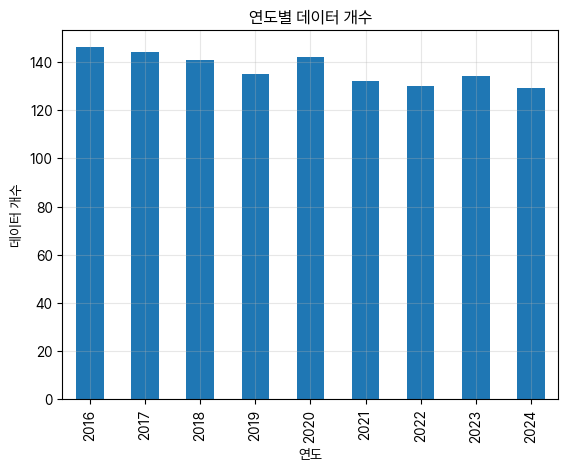

In [12]:
yearly_counts = df['year'].value_counts().sort_index()
print('연도별 데이터 개수:')
print(yearly_counts)

yearly_counts.plot(kind='bar')
plt.title('연도별 데이터 개수')
plt.xlabel('연도')
plt.ylabel('데이터 개수')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# 2020년 데이터 제거
df2020 = df[df['year'] == 2020]
df = df[df['year'] != 2020]

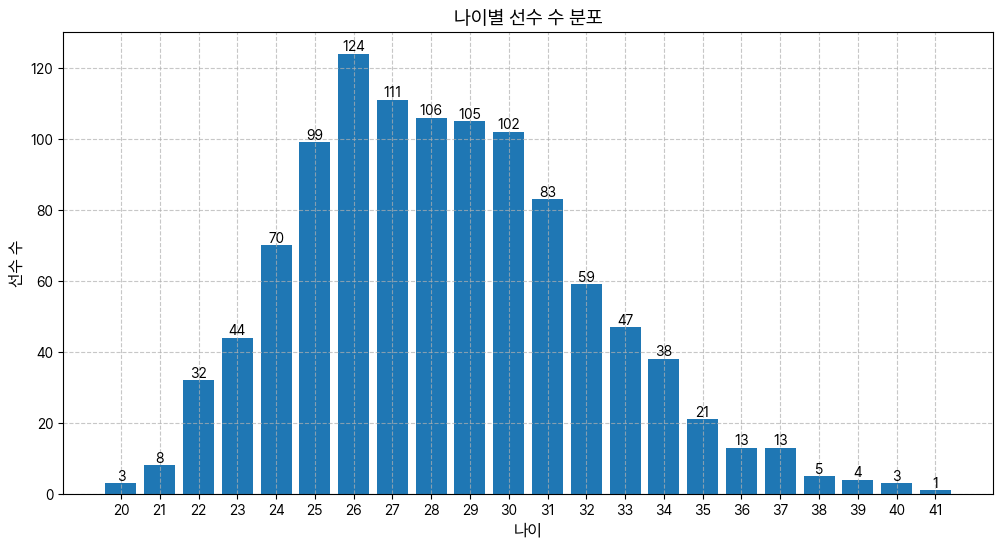


나이별 선수 수:
player_age
20      3
21      8
22     32
23     44
24     70
25     99
26    124
27    111
28    106
29    105
30    102
31     83
32     59
33     47
34     38
35     21
36     13
37     13
38      5
39      4
40      3
41      1
Name: count, dtype: int64
Shapiro-Wilk: 통계량=0.9799, p-value=0.0000
정규성 만족 여부: 만족하지 않음


In [14]:
import scipy.stats as stats

# 나이별 선수 수 계산
age_counts = df['player_age'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values)
plt.title('나이별 선수 수 분포', fontsize=14)
plt.xlabel('나이', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(age_counts.index)

# 각 막대 위에 값 표시
for i, v in enumerate(age_counts.values):
    plt.text(age_counts.index[i], v, str(v), ha='center', va='bottom')

plt.show()

# 나이별 선수 수 출력
print('\n나이별 선수 수:')
print(age_counts)

stat, p_value = stats.shapiro(df['player_age'])
print(f'Shapiro-Wilk: 통계량={stat:.4f}, p-value={p_value:.4f}')
print(f"정규성 만족 여부: {'만족하지 않음' if p_value < 0.05 else '만족'}")

나이별 평균 타격 지표:
            batting_avg  home_run
player_age                       
20                 0.28     23.33
21                 0.27     26.38
22                 0.27     23.31
23                 0.26     22.05
24                 0.26     22.66
25                 0.27     22.55
26                 0.27     21.94
27                 0.27     20.87
28                 0.27     22.58
29                 0.26     23.72
30                 0.26     24.30
31                 0.26     22.78
32                 0.27     21.07
33                 0.27     20.26
34                 0.27     18.71
35                 0.26     21.52
36                 0.25     21.77
37                 0.27     21.85
38                 0.26     22.00
39                 0.26     18.00
40                 0.27     28.00
41                 0.23     10.00


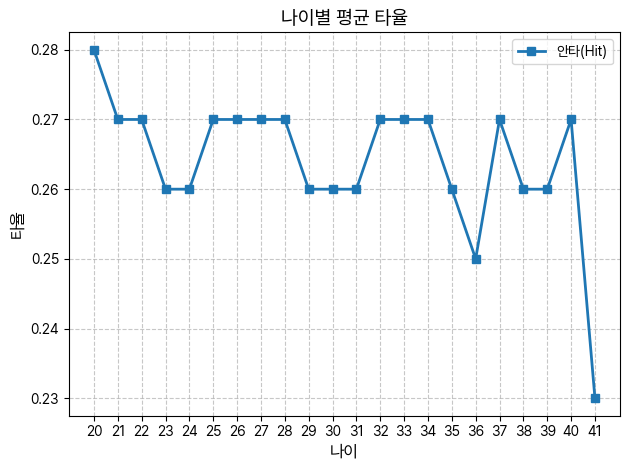

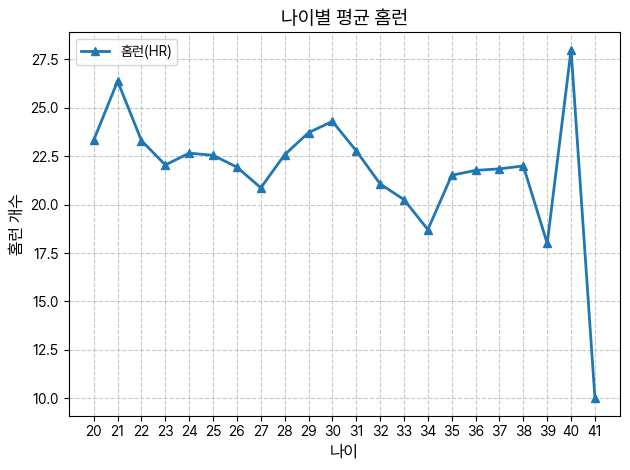

In [15]:
age_stats = df.groupby('player_age').agg({
    'batting_avg': 'mean',
    'home_run': 'mean',
}).round(2)

print('나이별 평균 타격 지표:')
print(age_stats)

plt.title('나이별 평균 타율', fontsize=14)
plt.plot(age_stats.index, age_stats['batting_avg'], marker='s', label='안타(Hit)', linewidth=2)
plt.xlabel('나이', fontsize=12)
plt.ylabel('타율', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(age_stats.index)
plt.legend()
plt.tight_layout()
plt.show()

plt.title('나이별 평균 홈런', fontsize=14)
plt.plot(age_stats.index, age_stats['home_run'], marker='^', label='홈런(HR)', linewidth=2)
plt.xlabel('나이', fontsize=12)
plt.ylabel('홈런 개수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(age_stats.index)
plt.legend()
plt.tight_layout()
plt.show()

=== 나이 그룹별 기술통계량 ===
          batting_avg               home_run                
                count   mean    std    count    mean     std
age_group                                                   
25세 이하            256  0.268  0.026      256  22.715   9.624
26-30세            548  0.266  0.027      548  22.628  10.363
31-35세            248  0.265  0.028      248  21.165   9.196
35세 초과             39  0.259  0.030       39  21.615   9.207


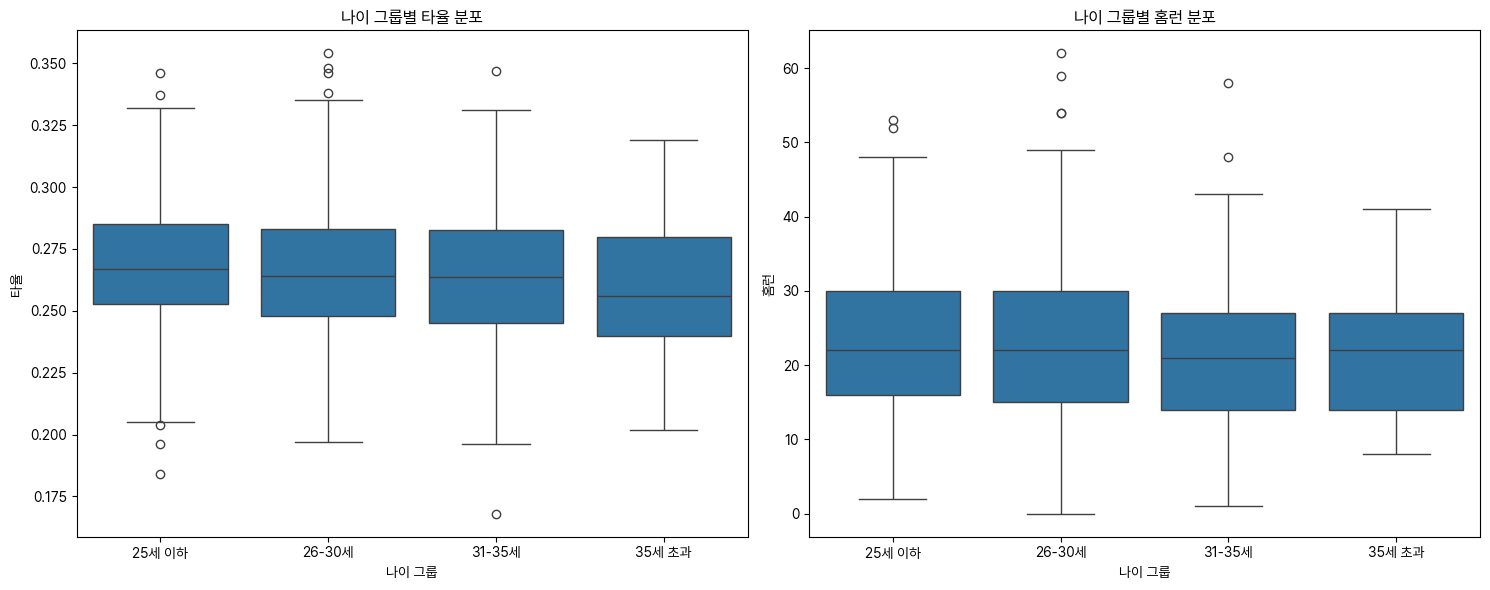


=== 가설 검정 ===

1. 타율에 대한 가설
귀무가설(H0): 나이 그룹 간 평균 타율에 차이가 없다
대립가설(H1): 적어도 하나의 나이 그룹의 평균 타율이 다르다

타율 ANOVA 결과:
F-통계량: 1.3492
p-value: 0.2570
결론: 귀무가설 채택(그룹 간 차이가 없음)

2. 홈런에 대한 가설
귀무가설(H0): 나이 그룹 간 평균 홈런 수에 차이가 없다
대립가설(H1): 적어도 하나의 나이 그룹의 평균 홈런 수가 다르다

홈런 ANOVA 결과:
F-통계량: 1.4974
p-value: 0.2136
결론: 귀무가설 채택(그룹 간 차이가 없음)


In [16]:
# 나이 그룹 설정(4개 그룹)
df['age_group'] = pd.cut(df['player_age'], 
                        bins=[0, 25, 30, 35, float('inf')],
                        labels=['25세 이하', '26-30세', '31-35세', '35세 초과'])

# 그룹별 평균 계산
group_stats = df.groupby('age_group').agg({
    'batting_avg': ['count', 'mean', 'std'],
    'home_run': ['count', 'mean', 'std']
}).round(3)

print("=== 나이 그룹별 기술통계량 ===")
print(group_stats)

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 타율 박스플롯
sns.boxplot(data=df, x='age_group', y='batting_avg', ax=ax1)
ax1.set_title('나이 그룹별 타율 분포')
ax1.set_xlabel('나이 그룹')
ax1.set_ylabel('타율')

# 홈런 박스플롯
sns.boxplot(data=df, x='age_group', y='home_run', ax=ax2)
ax2.set_title('나이 그룹별 홈런 분포')
ax2.set_xlabel('나이 그룹')
ax2.set_ylabel('홈런')

plt.tight_layout()
plt.show()

# ANOVA 검정
from scipy import stats

print("\n=== 가설 검정 ===")
print("\n1. 타율에 대한 가설")
print("귀무가설(H0): 나이 그룹 간 평균 타율에 차이가 없다")
print("대립가설(H1): 적어도 하나의 나이 그룹의 평균 타율이 다르다")

f_stat_avg, p_value_avg = stats.f_oneway(
    df[df['age_group'] == '25세 이하']['batting_avg'],
    df[df['age_group'] == '26-30세']['batting_avg'],
    df[df['age_group'] == '31-35세']['batting_avg'],
    df[df['age_group'] == '35세 초과']['batting_avg']
)

print(f"\n타율 ANOVA 결과:")
print(f"F-통계량: {f_stat_avg:.4f}")
print(f"p-value: {p_value_avg:.4f}")
print(f"결론: {'귀무가설 기각(그룹 간 차이가 있음)' if p_value_avg < 0.05 else '귀무가설 채택(그룹 간 차이가 없음)'}")

print("\n2. 홈런에 대한 가설")
print("귀무가설(H0): 나이 그룹 간 평균 홈런 수에 차이가 없다")
print("대립가설(H1): 적어도 하나의 나이 그룹의 평균 홈런 수가 다르다")

f_stat_hr, p_value_hr = stats.f_oneway(
    df[df['age_group'] == '25세 이하']['home_run'],
    df[df['age_group'] == '26-30세']['home_run'],
    df[df['age_group'] == '31-35세']['home_run'],
    df[df['age_group'] == '35세 초과']['home_run']
)

print(f"\n홈런 ANOVA 결과:")
print(f"F-통계량: {f_stat_hr:.4f}")
print(f"p-value: {p_value_hr:.4f}")
print(f"결론: {'귀무가설 기각(그룹 간 차이가 있음)' if p_value_hr < 0.05 else '귀무가설 채택(그룹 간 차이가 없음)'}")

In [17]:
players_below_30 = df[df['player_age'] <= 30]
num_players_below_30 = len(players_below_30)
print('30세 이하의 선수 수:', num_players_below_30)

players_31_35 = df[(df['player_age'] >= 31) & (df['player_age'] <= 35)]
num_players_31_35 = len(players_31_35)
print('31세 이상 35세 이하의 선수 수:', num_players_31_35)

players_above_35 = df[df['player_age'] > 35]
num_players_above_35 = len(players_above_35)
print('35세 이상의 선수 수:', num_players_above_35)

30세 이하의 선수 수: 804
31세 이상 35세 이하의 선수 수: 248
35세 이상의 선수 수: 39


# 2. Data correlations analysis

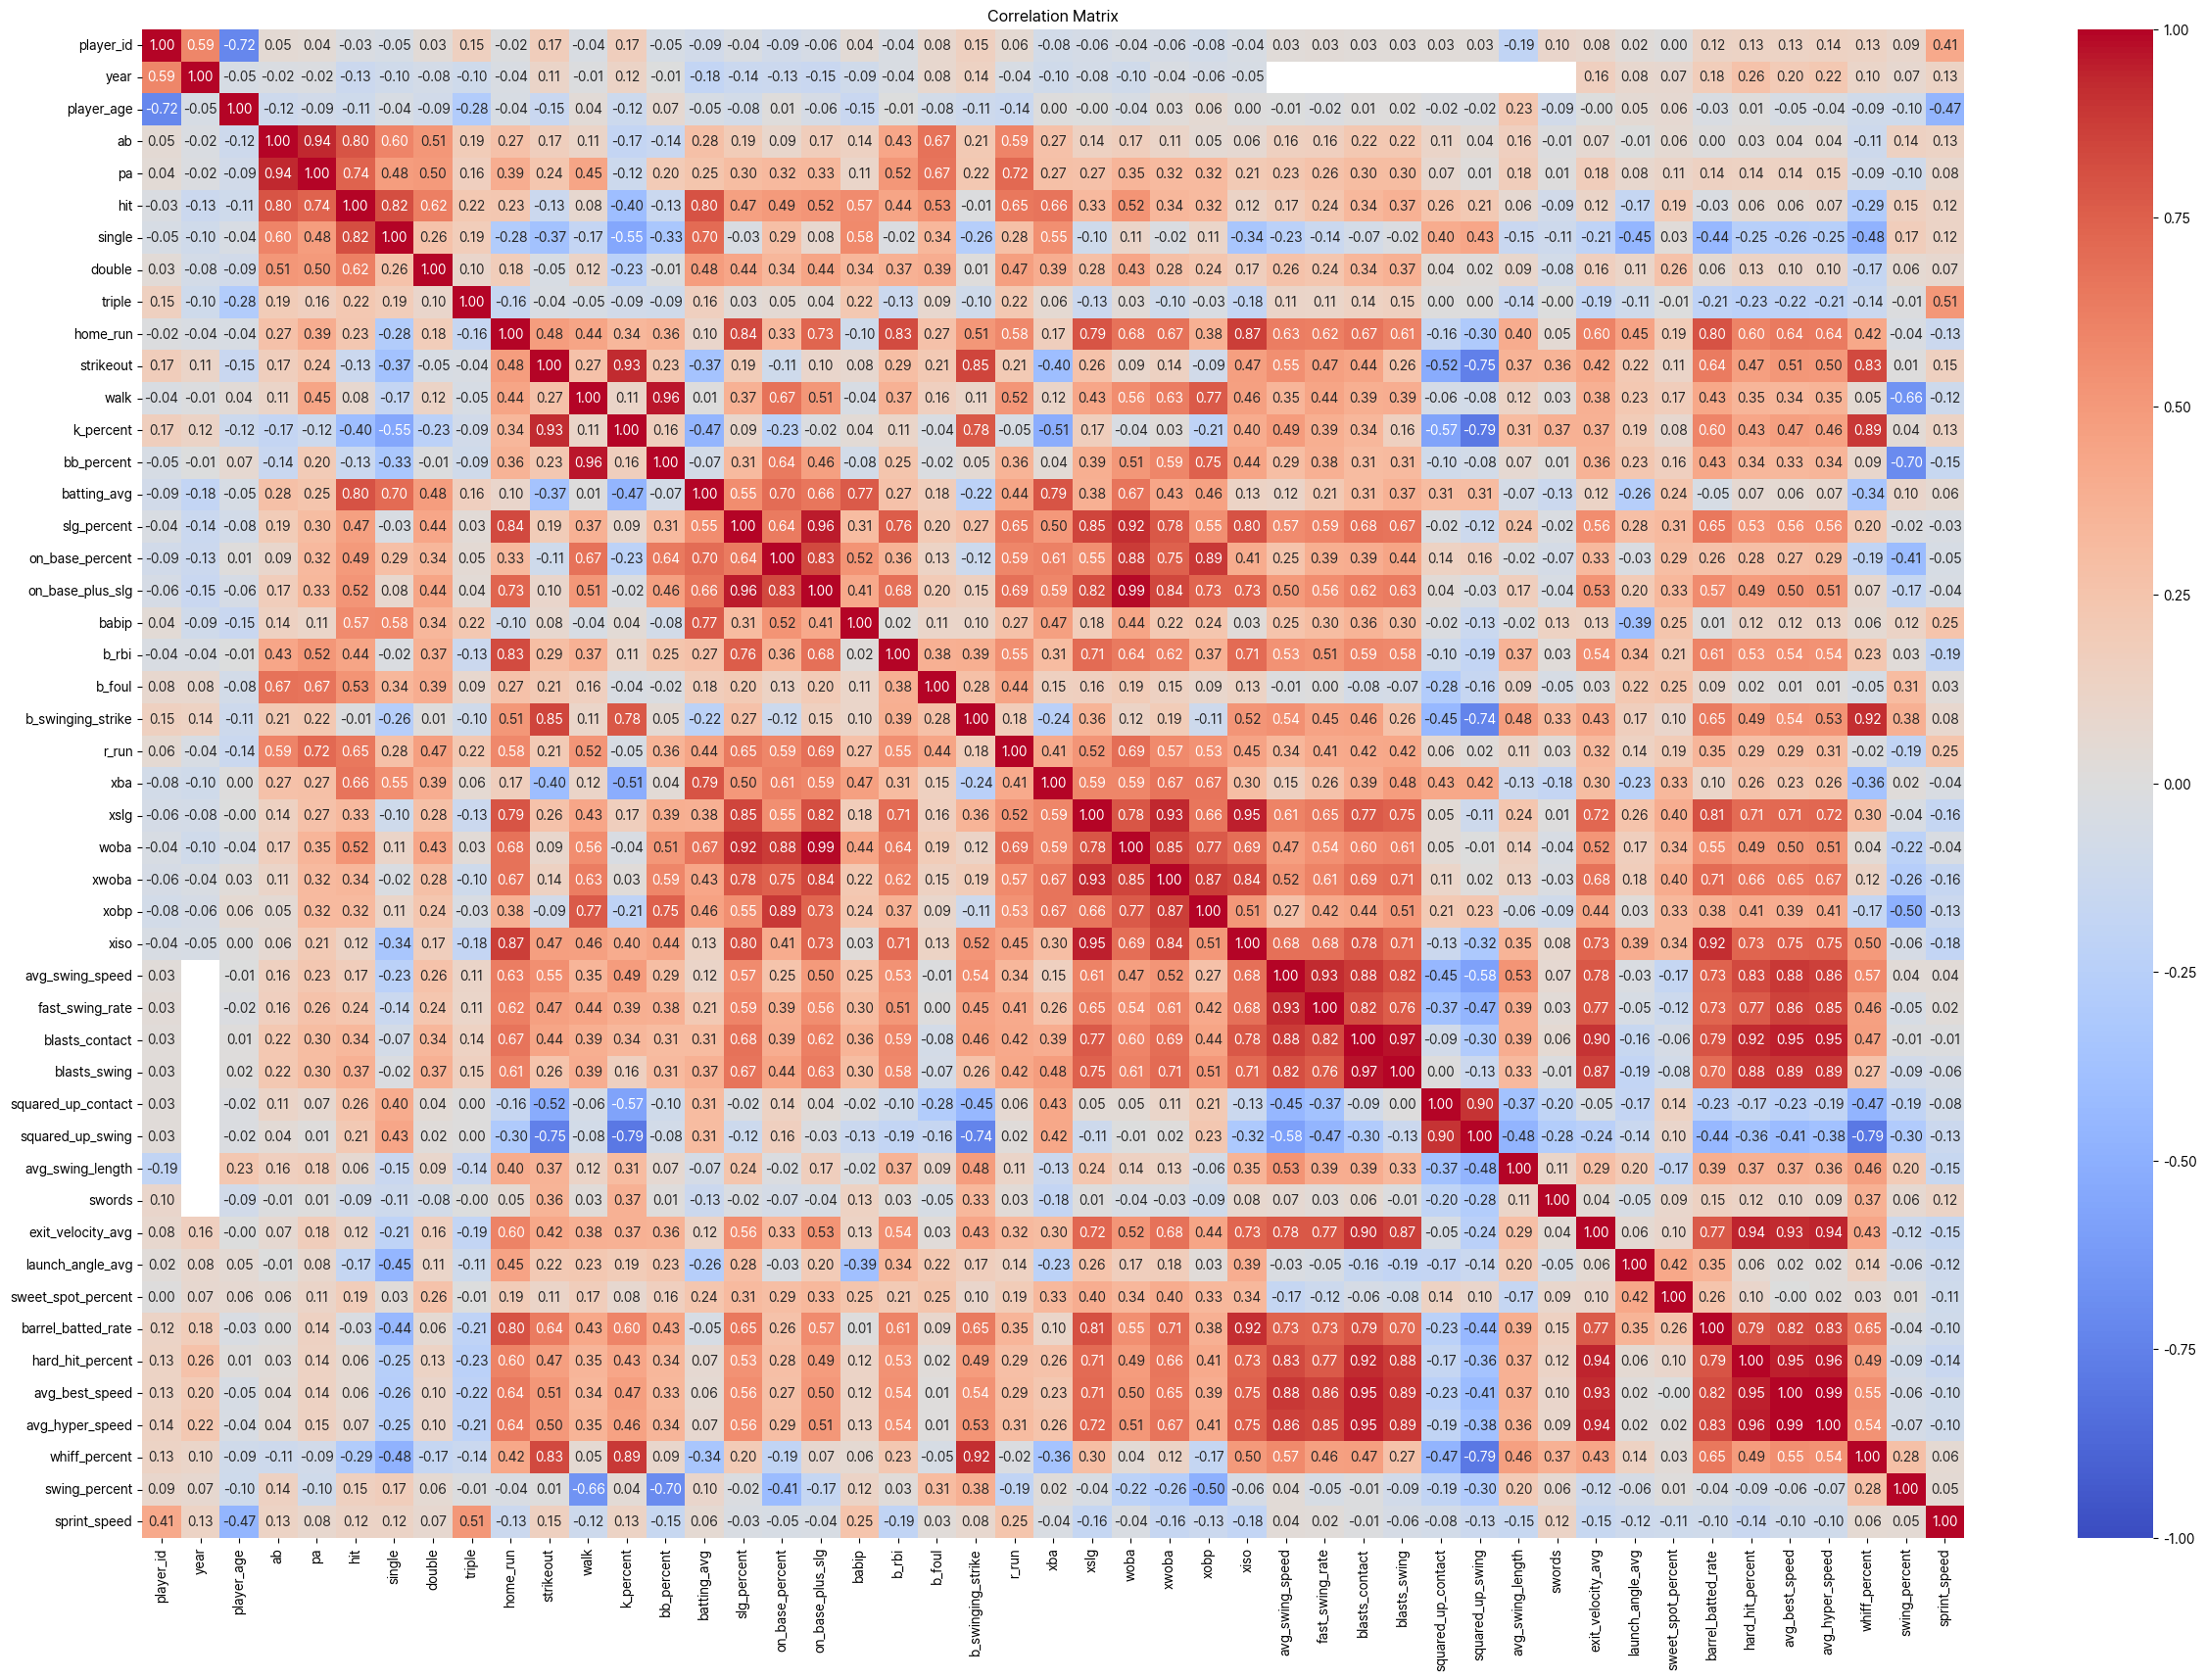

In [18]:
# Heatmap으로 변수간의 전반적인 상관관계를 시각화

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Column이 굉장히 많기 때문에, 전체를 heatmap으로 보는 것은 불편하다.

따라서 주요 관심 변수(연도, 나이, 포지션, 타율 등)을 정하고 그룹을 나누어 각각 상관분석을 진행하였다.

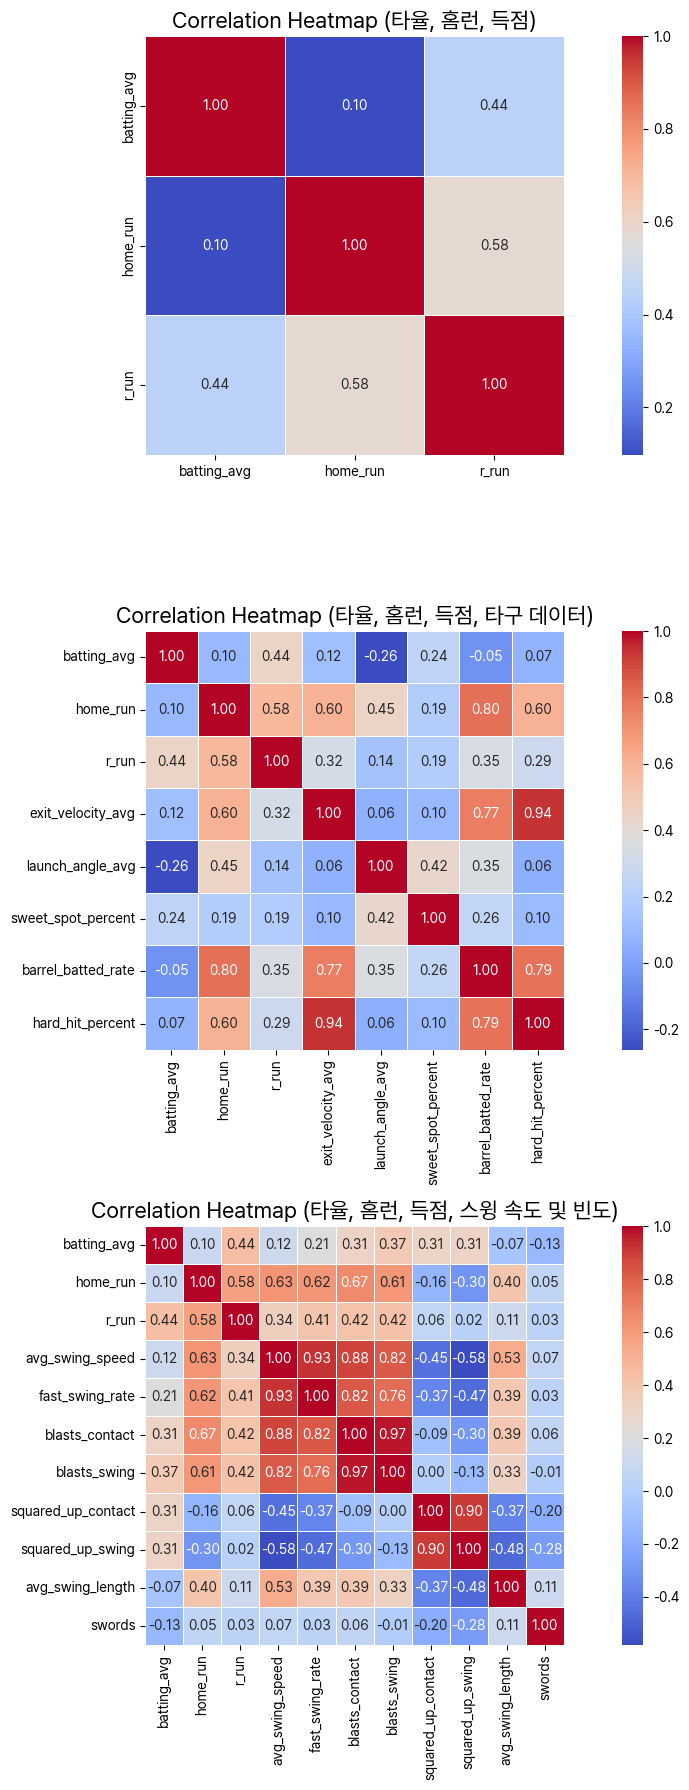

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. 타율, 홈런, 득점의 상관 관계
correlation_matrix_1 = df[['batting_avg', 'home_run', 'r_run']].corr()
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap (타율, 홈런, 득점)', fontsize=16)

# 2. 타율, 홈런, 득점과 타구 데이터의 상관 관계
correlation_matrix_2 = df[['batting_avg', 'home_run', 'r_run', 'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate', 'hard_hit_percent']].corr()
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, ax=axes[1])
axes[1].set_title('Correlation Heatmap (타율, 홈런, 득점, 타구 데이터)', fontsize=16)

# 3. 타율, 홈런, 득점과 스윙 속도 및 빈도 관련 변수들의 상관 관계
correlation_matrix_3 = df[['batting_avg', 'home_run', 'r_run', 'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing', 'squared_up_contact', 'squared_up_swing', 'avg_swing_length', 'swords']].corr()
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, ax=axes[2])
axes[2].set_title('Correlation Heatmap (타율, 홈런, 득점, 스윙 속도 및 빈도)', fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.show()

## Heatmap 상관관계 분석 시각화

Heatmap으로 평균 타율, 홈런, 득점(성과)과
- 나이
- 타구 관련 변수
- 스윙 관련 변수

들의 상관관계를 시각화 해 보았다

### 1. 나이와 성과의 상관관계

나이는 성과 변수들과 음의 상관관계를 보였지만, 그 정도가 전부 소숫점 두 자리수대로 크지 않았다.

### 2. 타구와 성과의 상관관계

높은 상관관계를 가진 변수들은 다음과 같았다.
- 배럴 타구율과 홈런 : 0.69 양의 상관관계
- 평균 타구 속도와 홈런 : 0.54 양의 상관관계

약간의 상관관계를 가진 변수들은 다음과 같았다.
- 평균 발사각과 타율 : -0.25 음의 상관관계

타구 데이터

exit_velocity_avg: 평균 타구 속도(Exit Velocity).
launch_angle_avg: 평균 발사각(Launch Angle).
sweet_spot_percent: 스위트 스팟(Sweet Spot)에 적중한 비율.
barrel_batted_rate: 배럴 타구율(Barrel Rate) - 발사각과 타구 속도가 적절히 결합된 타구의 비율.
hard_hit_percent: 강한 타구 비율(Hard Hit %) - 타구 속도가 일정 기준 이상인 타구 비율.

### 3. 스윙과 성과의 상관관계

높은 상관관계를 가진 변수들은 다음과 같았다.
- 강력한 타구 접촉 수와 홈런 : 0.67 양의 상관관계
- 평균 스윙 속도와 홈런 : 0.63 양의 상관관계
- 빠른 스윙의 비율과 홈런 : 0.62 양의 상관관계
- 스윙으로 강력한 타구를 친 횟수 : 0.61 양의 상관관계

스윙 관련 변수들과 성과들은 대체적으로 양의 상관관계를 가졌다.

스윙 속도 및 빈도

avg_swing_speed: 평균 스윙 속도.
fast_swing_rate: 빠른 스윙의 비율.
blasts_contact: 강력한 타구(Blasts) 접촉 수.
blasts_swing: 스윙으로 강력한 타구를 친 횟수.
squared_up_contact: 적절히 맞춘 타구의 개수.
squared_up_swing: 적절히 맞춘 스윙의 개수.
avg_swing_length: 평균 스윙 길이.
swords: 헛스윙(낚아채는) 횟수.

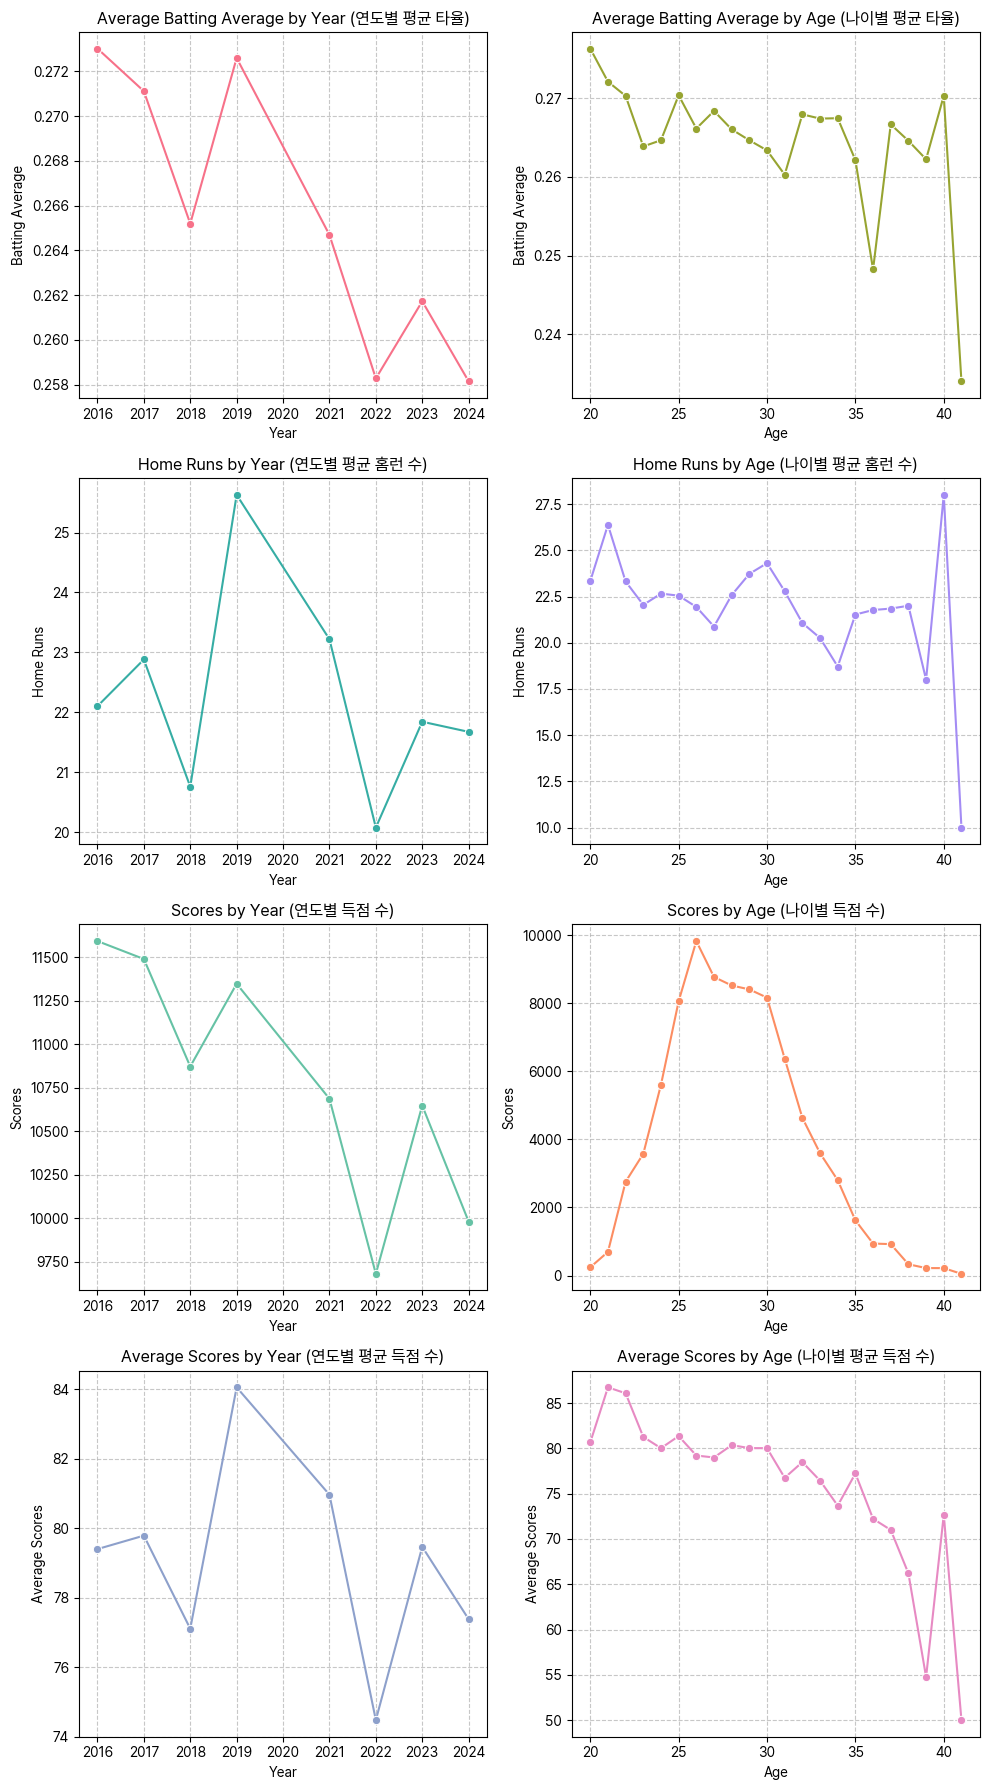

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(10, 18))

# 색상 팔레트 설정
colors = sns.color_palette('husl', 4)

# 1. 연도별 평균 타율
sns.lineplot(data=df, x='year', y='batting_avg', marker='o', errorbar=None, ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('Average Batting Average by Year (연도별 평균 타율)', fontsize=12)
axes[0, 0].set_xlabel('Year', fontsize=10)
axes[0, 0].set_ylabel('Batting Average', fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# 2. 나이별 평균 타율
sns.lineplot(data=df, x='player_age', y='batting_avg', marker='o', errorbar=None, ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Average Batting Average by Age (나이별 평균 타율)', fontsize=12)
axes[0, 1].set_xlabel('Age', fontsize=10)
axes[0, 1].set_ylabel('Batting Average', fontsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# 3. 연도별 평균 홈런 수
home_run_by_year = df.groupby('year')['home_run'].mean().reset_index()
sns.lineplot(data=home_run_by_year, x='year', y='home_run', marker='o', errorbar=None, ax=axes[1, 0], color=colors[2])
axes[1, 0].set_title('Home Runs by Year (연도별 평균 홈런 수)', fontsize=12)
axes[1, 0].set_xlabel('Year', fontsize=10)
axes[1, 0].set_ylabel('Home Runs', fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# 4. 나이별 홈런 수
sns.lineplot(data=df, x='player_age', y='home_run', marker='o', errorbar=None, ax=axes[1, 1], color=colors[3])
axes[1, 1].set_title('Home Runs by Age (나이별 평균 홈런 수)', fontsize=12)
axes[1, 1].set_xlabel('Age', fontsize=10)
axes[1, 1].set_ylabel('Home Runs', fontsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# 색상 팔레트 설정 (다른 팔레트 사용)
colors = sns.color_palette('Set2', 4)

# 5. 연도별 득점 수 (총합)
score_by_year = df.groupby('year')['r_run'].sum().reset_index()
sns.lineplot(data=score_by_year, x='year', y='r_run', marker='o', errorbar=None, ax=axes[2, 0], color=colors[0])
axes[2, 0].set_title('Scores by Year (연도별 득점 수)', fontsize=12)
axes[2, 0].set_xlabel('Year', fontsize=10)
axes[2, 0].set_ylabel('Scores', fontsize=10)
axes[2, 0].grid(True, linestyle='--', alpha=0.7)

# 6. 나이별 득점 수 (총합)
score_by_age = df.groupby('player_age')['r_run'].sum().reset_index()
sns.lineplot(data=score_by_age, x='player_age', y='r_run', marker='o', errorbar=None, ax=axes[2, 1], color=colors[1])
axes[2, 1].set_title('Scores by Age (나이별 득점 수)', fontsize=12)
axes[2, 1].set_xlabel('Age', fontsize=10)
axes[2, 1].set_ylabel('Scores', fontsize=10)
axes[2, 1].grid(True, linestyle='--', alpha=0.7)

# 7. 연도별 평균 득점 수
avg_score_by_year = df.groupby('year')['r_run'].mean().reset_index()
sns.lineplot(data=avg_score_by_year, x='year', y='r_run', marker='o', errorbar=None, ax=axes[3, 0], color=colors[2])
axes[3, 0].set_title('Average Scores by Year (연도별 평균 득점 수)', fontsize=12)
axes[3, 0].set_xlabel('Year', fontsize=10)
axes[3, 0].set_ylabel('Average Scores', fontsize=10)
axes[3, 0].grid(True, linestyle='--', alpha=0.7)

# 8. 나이별 평균 득점 수
avg_score_by_age = df.groupby('player_age')['r_run'].mean().reset_index()
sns.lineplot(data=avg_score_by_age, x='player_age', y='r_run', marker='o', errorbar=None, ax=axes[3, 1], color=colors[3])
axes[3, 1].set_title('Average Scores by Age (나이별 평균 득점 수)', fontsize=12)
axes[3, 1].set_xlabel('Age', fontsize=10)
axes[3, 1].set_ylabel('Average Scores', fontsize=10)
axes[3, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
# 40대 이상의 선수 수 출력

players_above_40 = df[df['player_age'] >= 40]
num_players_above_40 = len(players_above_40)

print('40대 이상의 선수 수:', num_players_above_40)

40대 이상의 선수 수: 4


## lineplot으로 시각화

- 연도별 데이터를 보았을 때, 2020년의 값이 매우 작은 것을 알 수 있는데, 이는 코로나19로 인한 경기 중단으로 데이터의 개수가 부족하기에 밣생한 현상으로 보인다.
- 나이별 득점수는 20살부터 증가하는 추세를 보이고 25살에 가장 높은 값을 가지며, 그 이후로는 꾸준하게 감소하는 모습을 볼 수 있었다.
- 나이별 타율은 큰 연관이 없는 것으로 보였다.
- 나이별 평균 득점수는 나이가 증가할 수록 조금씩 감소하는 추세가 보였다.
- 나이별 성과 관련 그래프를 보았을 때, 40대의 값이 매우 작은 것을 볼 수 있는데, 이는 40대 이상의 선수의 데이터가 3개밖에 존재하지 않기 때문임을 알 수 있다.